In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format
%reload_ext nb_black

In [2]:
data_r = pd.read_csv(r'Wine\winequality_red.csv')
data_w = pd.read_csv(r'Wine\winequality_white.csv')

In [3]:
data_r.columns == data_w.columns # Check if red wines and white wines have same columns [features]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [4]:
# We can join our data

In [5]:
data_r['color'] = 'Red'
data_w['color'] = 'White'

In [6]:
wines = pd.concat([data_r,data_w],axis=0)
wines.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1547,6.30,0.60,0.10,1.60,0.05,12.00,26.00,0.99,3.55,0.51,12.10,5,Red
1262,9.80,0.45,0.38,2.50,0.08,34.00,66.00,1.00,3.15,0.58,9.80,5,Red
2473,6.00,0.29,0.21,15.55,0.04,20.00,142.00,1.00,3.11,0.54,10.10,6,White
2286,6.60,0.41,0.24,4.90,0.16,47.00,144.00,0.99,3.17,0.49,9.40,5,White
1230,7.30,0.29,0.30,13.00,0.04,46.00,238.00,1.00,3.06,0.41,8.70,6,White


In [7]:
wines.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [8]:
# We can see that we don't have any nulls in our data. And now shape of data is 6497 items.

In [9]:
wines = pd.get_dummies(wines, columns=["color"])

In [10]:
wines = wines.rename(columns={'color_Red':'Red','color_White':'White'})

In [11]:
wines.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Red,White
3319,5.10,0.21,0.28,1.40,0.05,48.00,148.00,0.99,3.50,0.49,10.40,5,0,1
657,7.30,0.34,0.21,3.20,0.05,14.00,136.00,0.99,3.25,0.44,10.20,5,0,1
2533,6.40,0.22,0.30,11.20,0.05,53.00,149.00,0.99,3.21,0.34,10.80,5,0,1


In [12]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Red,White
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82,0.25,0.75
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87,0.43,0.43
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00,0.00,0.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00,0.00,1.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00,0.00,1.00
75%,7.70,0.40,0.39,8.10,0.07,41.00,156.00,1.00,3.32,0.60,11.30,6.00,0.00,1.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00,1.00,1.00


In [13]:
wines_nodummy = pd.concat([data_r,data_w],axis=0)

In [14]:
wines_nodummy.groupby('color')['color'].count()

color
Red      1599
White    4898
Name: color, dtype: int64

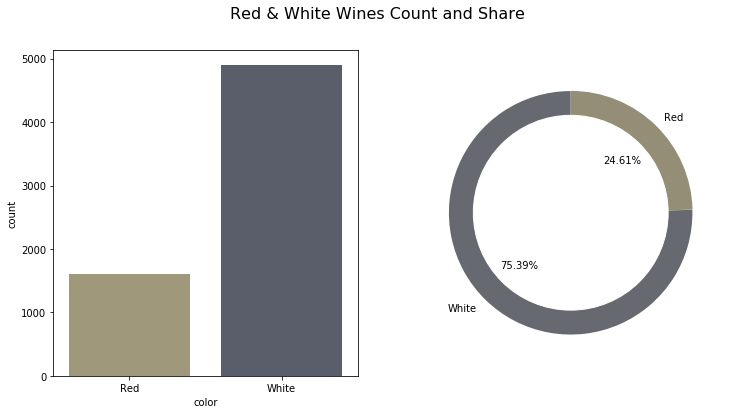

In [16]:
from matplotlib import cm
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(data=wines_nodummy,x='color',palette='cividis_r',ax=ax[0])
color = cm.cividis(np.linspace(.4,.6, 2))
my_circle=plt.Circle( (0,0), 0.8, color='white')
names=wines_nodummy['color'].value_counts().index.tolist()
size=wines_nodummy['color'].value_counts().values.tolist()
plt.pie(size, labels=names, colors=color,autopct='%1.2f%%',explode = (0.001,0.001),startangle=90)
p=plt.gcf()
p.gca().add_artist(my_circle)
f.suptitle("Red & White Wines Count and Share", fontsize=16)
plt.show()

We can see that there is much more White Wines in our dataset. __75%__ of wines are white.
* Red color wines: __1599__ 
* White color wines: __4898__

In [17]:
q = wines_nodummy.groupby('color').agg(['mean','std','count','min','max'])['quality']
q = q.reset_index()
q

,color,mean,std,count,min,max
0,Red,5.64,0.81,1599,3,8
1,White,5.88,0.89,4898,3,9


''

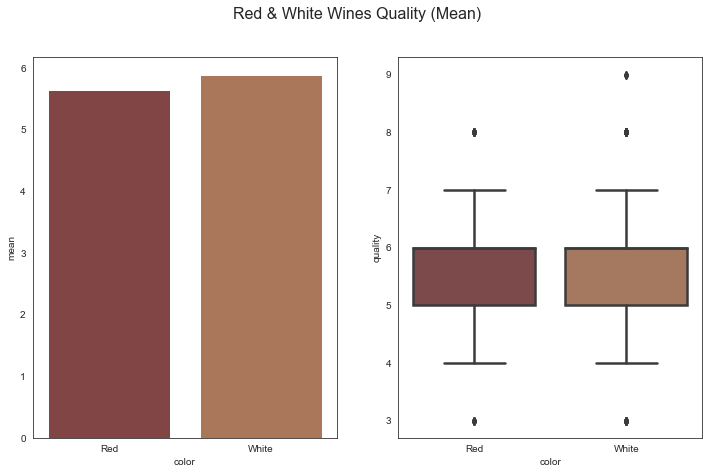

In [18]:
sns.set_style("white")
f, ax = plt.subplots(1,2,figsize=(12,7))
sns.barplot(data=q,y='mean',x='color',palette='tab20b_d',saturation=0.9,ax=ax[0]);
sns.boxplot(data=wines_nodummy,y='quality',linewidth=2.5,x='color',palette='tab20b_d',ax=ax[1])#showmeans=True);
f.suptitle("Red & White Wines Quality (Mean)", fontsize=16)
;
    

In [19]:
mode_r,mode_w = data_r['quality'].mode(),data_w['quality'].mode()
print(f'Mode for Red wines is {int(mode_r)} and for White wine mode is {int(mode_w)}')

Mode for Red wines is 5 and for White wine mode is 6


We can see that mean score for white wines is bigger then for red wines.
* Red wines: mean score __5.64__
* White wines: __5.88__   
* Red wines min-max quality: __3 to 8__
* White wines min-max quality: __3 to 8__
* Mode for Red wines is __5__ 
* Mode for White wine is __6__

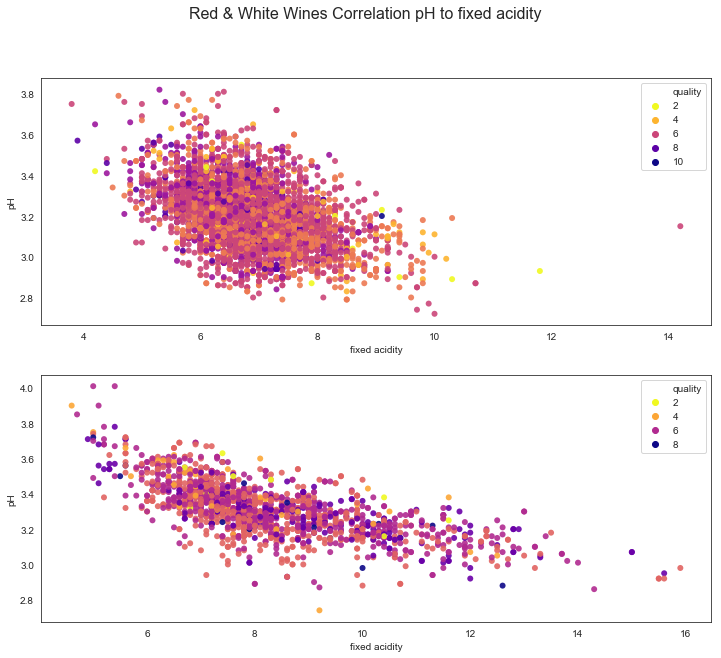

In [20]:
f,ax = plt.subplots(2,1,figsize=(12,10))
#sns.despine(f, left=True, bottom=True)
sns.scatterplot(data=wines_nodummy[wines_nodummy['color']=='White'],x='fixed acidity',y='pH',hue='quality',palette="plasma_r", linewidth=0,ax=ax[0],alpha=.9);
sns.scatterplot(data=wines_nodummy[wines_nodummy['color']=='Red'],x='fixed acidity',y='pH',hue='quality',palette="plasma_r", linewidth=0,ax=ax[1],alpha=.9);
f.suptitle("Red & White Wines Correlation pH to fixed acidity", fontsize=16);

In [21]:
print('Red wines correlation pH to fixed acidity: ',round(wines_nodummy[wines_nodummy['color']=='Red'][['pH','fixed acidity']].corr()['pH']['fixed acidity'],2))
print('White wines correlation pH to fixed acidity: ',round(wines_nodummy[wines_nodummy['color']=='White'][['pH','fixed acidity']].corr()['pH']['fixed acidity'],2))

Red wines correlation pH to fixed acidity:  -0.68
White wines correlation pH to fixed acidity:  -0.43


We can see that red wines has stronger negative correlation between pH and fixed acidity then white wines. 
* Red wines correlation pH to fixed acidity:  __-0.68__
* White wines correlation pH to fixed acidity:  __-0.43__

In [27]:
red_corr = wines_nodummy[wines_nodummy['color']=='Red'].corr()
red_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


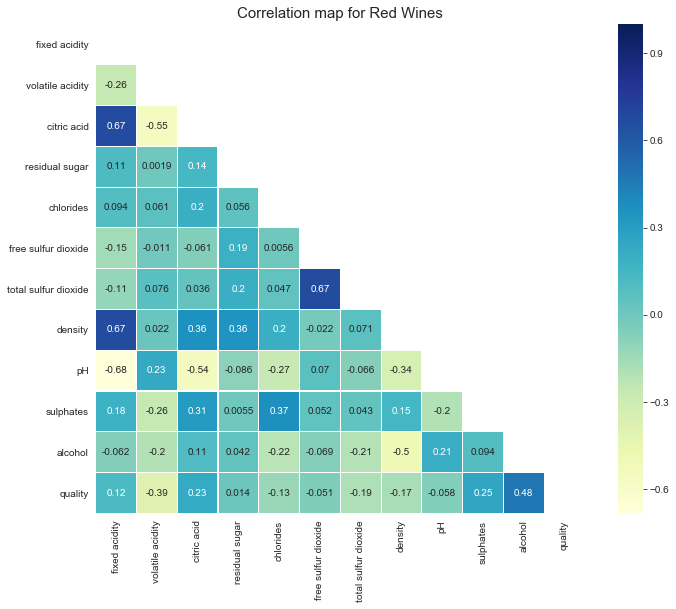

In [50]:
f,ax = plt.subplots(figsize=(12,9))
mask = np.zeros_like(red_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(red_corr,cmap='YlGnBu',annot=True,linewidths=.1,square=True,mask=mask);
plt.title('Correlation map for Red Wines',fontsize=15);

In [115]:
#red_corr.abs().unstack().sort_values(ascending=False)
#print(red_corr[(red_corr>0.5) & (red_corr<1)].stack().dropna().tolist())
print(red_corr[(red_corr>0.5) & (red_corr<1)].stack().dropna())
#print(red_corr[(red_corr>-1) & (red_corr<-0.5)].stack().dropna().tolist())
print(red_corr[(red_corr>-1) & (red_corr<-0.5)].stack().dropna())

fixed acidity         citric acid            0.67
                      density                0.67
citric acid           fixed acidity          0.67
free sulfur dioxide   total sulfur dioxide   0.67
total sulfur dioxide  free sulfur dioxide    0.67
density               fixed acidity          0.67
dtype: float64
fixed acidity     pH                 -0.68
volatile acidity  citric acid        -0.55
citric acid       volatile acidity   -0.55
                  pH                 -0.54
pH                fixed acidity      -0.68
                  citric acid        -0.54
dtype: float64


We can see that in Red Wines there is pretty big positive correlation between:
   * citric acid : fixed acidity __0.672__
   * fixed acidity : density __0.668__
   * free sulfur dioxide : total sulfur dioxide __0.667__
And there is also strong negative correlation between:
   * fixed acidity : pH __-0.682__
   * volatile acidity : citric acid __-0.552__
   * citric acid : pH __-0.542__

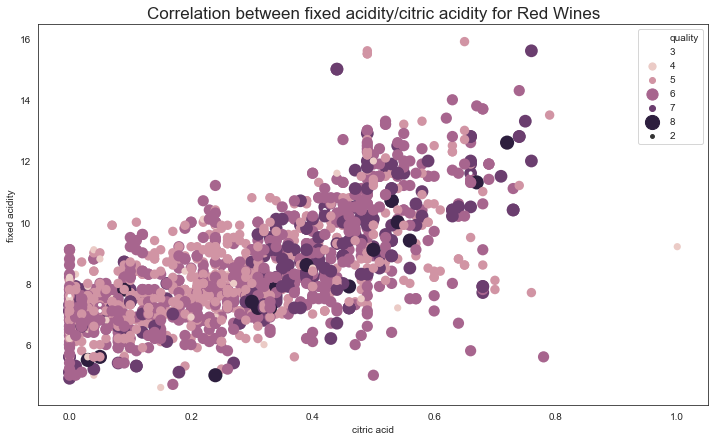

In [150]:
palette = sns.cubehelix_palette(light=1, n_colors=6)
f,ax = plt.subplots(figsize=(12,7))
sns.scatterplot(x="citric acid", y="fixed acidity",           
                palette=palette,
                hue='quality',
                size='quality',sizes=(15, 200), linewidth=0,
                data=wines_nodummy[wines_nodummy['color']=='Red']);
plt.title(f'Correlation between fixed acidity/citric acidity for Red Wines',fontsize=17);

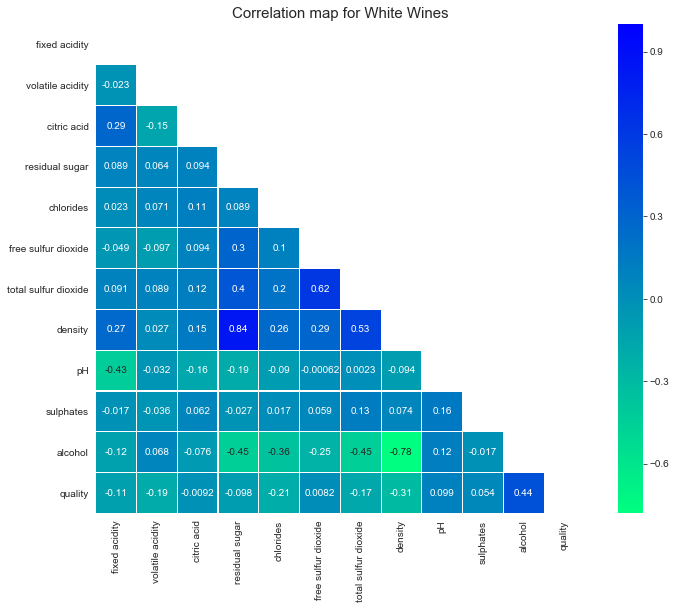

In [160]:
white_corr = wines_nodummy[wines_nodummy['color']=='White'].corr()
f,ax = plt.subplots(figsize=(12,9))
mask = np.zeros_like(white_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(white_corr,cmap='winter_r',annot=True,linewidths=.1,square=True,mask=mask);
plt.title('Correlation map for White Wines',fontsize=15);

In [161]:
print(white_corr[(white_corr>0.5) & (white_corr<1)].stack().dropna())
print(white_corr[(white_corr>-1) & (white_corr<-0.5)].stack().dropna())

residual sugar        density                0.84
free sulfur dioxide   total sulfur dioxide   0.62
total sulfur dioxide  free sulfur dioxide    0.62
                      density                0.53
density               residual sugar         0.84
                      total sulfur dioxide   0.53
dtype: float64
density  alcohol   -0.78
alcohol  density   -0.78
dtype: float64
